Завдання до лабораторної роботи
Створити програму, яка виконує завдання відповідно до варіанту:
Варіант 1.
Зчитати файл doc1. Вважати кожен рядок окремим документом
корпусу. Виконати попередню обробку корпусу.
1) Представити корпус як модель «Сумка слів». Вивести вектор для
слова «film».
2) Представити корпус як модель TD-IDF. Спробувати
кластеризувати документи за допомогою ієрархічної
агломераційної кластеризації.
3) Представити корпус як модель Word2Vec. Знайти подібні слова
до слів shrimp, economy.

In [1]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.tokenize import sent_tokenize
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from gensim.models import word2vec

In [2]:
# зчитуємо файл по рядкам
with open('doc1_3.txt', 'r') as file:
    corpus = file.readlines()
print(corpus)

['Whisk the lime juice, oil, chipotle powder, salt, and cumin together in a large bowl. Add the shrimp and toss to combine.\n', 'Growth in Japan evaporated in the three months to September, sparking renewed concern about an economy not long out of a decade-long trough.\n', 'The independent film festival will feature two new international cinema competitions.\n', 'Serve the shrimp with the tortillas and salsa.\n', 'Twelve films competing in the new world cinema documentary category.\n', 'The economy had stagnated throughout the 1990s.\n', 'Actor Daniel Day-Lewis is to be presented with an award for his career in film at the Berlin Film Festival.']


In [3]:
# виконуємо поперідню підготовку документу...
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def preproc_doc(doc):
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    tokens = wpt.tokenize(doc)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc

preproc_corpus = np.vectorize(preproc_doc)
p_corpus = preproc_corpus(corpus)

print(p_corpus)

['whisk lime juice oil chipotle powder salt cumin together large bowl add shrimp toss combine'
 'growth japan evaporated three months september sparking renewed concern economy long decadelong trough'
 'independent film festival feature two new international cinema competitions'
 'serve shrimp tortillas salsa'
 'twelve films competing new world cinema documentary category'
 'economy stagnated throughout'
 'actor daniel daylewis presented award career film berlin film festival']


In [4]:
# створюємо функцію для пошуку вектора та уявляємо наші документи як сумку слів
def get_word_vector(word, cv_matrix, vocab):
    if word in vocab:
        index = vocab[word]
        vector = cv_matrix[:, index].toarray()
        nonzero_indices = vector.nonzero()[0]
        for i in nonzero_indices:
            print("({}, {})".format(i, index), vector[i][0])
    else:
        print("'{}' is not in the vocabulary.".format(word))

cv = CountVectorizer()
cv_matrix = cv.fit_transform(p_corpus)
print(cv_matrix)
vocab = cv.vocabulary_

get_word_vector('film', cv_matrix, vocab)

# cv = CountVectorizer()
# cv_matrix = cv.fit_transform(p_corpus)
# film_index = cv.vocabulary_.get('film')
# film_vector = cv_matrix[:, film_index]
# print(film_vector)


  (0, 53)	1
  (0, 30)	1
  (0, 28)	1
  (0, 34)	1
  (0, 7)	1
  (0, 35)	1
  (0, 39)	1
  (0, 13)	1
  (0, 47)	1
  (0, 29)	1
  (0, 4)	1
  (0, 1)	1
  (0, 42)	1
  (0, 49)	1
  (0, 9)	1
  (1, 24)	1
  (1, 27)	1
  (1, 19)	1
  (1, 45)	1
  (1, 32)	1
  (1, 40)	1
  (1, 43)	1
  (1, 37)	1
  (1, 12)	1
  (1, 18)	1
  :	:
  (2, 11)	1
  (3, 42)	1
  (3, 41)	1
  (3, 48)	1
  (3, 38)	1
  (4, 33)	1
  (4, 8)	1
  (4, 51)	1
  (4, 23)	1
  (4, 10)	1
  (4, 54)	1
  (4, 17)	1
  (4, 6)	1
  (5, 18)	1
  (5, 44)	1
  (5, 46)	1
  (6, 22)	2
  (6, 21)	1
  (6, 0)	1
  (6, 14)	1
  (6, 15)	1
  (6, 36)	1
  (6, 2)	1
  (6, 5)	1
  (6, 3)	1
(2, 22) 1
(6, 22) 2


In [5]:
#представляємо корпус як модель TD-IDF на основі матриці з частотою термів
tt = TfidfTransformer(norm='l2', use_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)
tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names_out()
print(pd.DataFrame(np.round(tt_matrix, 2), columns=vocab))

   actor   add  award  berlin  bowl  career  category  chipotle  cinema   
0   0.00  0.26   0.00    0.00  0.26    0.00      0.00      0.26    0.00  \
1   0.00  0.00   0.00    0.00  0.00    0.00      0.00      0.00    0.00   
2   0.00  0.00   0.00    0.00  0.00    0.00      0.00      0.00    0.30   
3   0.00  0.00   0.00    0.00  0.00    0.00      0.00      0.00    0.00   
4   0.00  0.00   0.00    0.00  0.00    0.00      0.37      0.00    0.31   
5   0.00  0.00   0.00    0.00  0.00    0.00      0.00      0.00    0.00   
6   0.31  0.00   0.31    0.31  0.00    0.31      0.00      0.00    0.00   

   combine  ...  three  throughout  together  tortillas  toss  trough  twelve   
0     0.26  ...   0.00        0.00      0.26       0.00  0.26    0.00    0.00  \
1     0.00  ...   0.28        0.00      0.00       0.00  0.00    0.28    0.00   
2     0.00  ...   0.00        0.00      0.00       0.00  0.00    0.00    0.00   
3     0.00  ...   0.00        0.00      0.00       0.52  0.00    0.00    0.

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0], [35.0, 35.0, 45.0, 45.0], [55.0, 55.0, 65.0, 65.0], [40.0, 40.0, 60.0, 60.0], [12.5, 12.5, 50.0, 50.0]], 'dcoord': [[0.0, 1.1045517205319766, 1.1045517205319766, 0.0], [0.0, 1.3620250271580145, 1.3620250271580145, 1.1045517205319766], [0.0, 1.2473936901078893, 1.2473936901078893, 0.0], [0.0, 1.2818381054828367, 1.2818381054828367, 0.0], [1.2473936901078893, 1.5639060579123933, 1.5639060579123933, 1.2818381054828367], [1.3620250271580145, 1.7076174442467749, 1.7076174442467749, 1.5639060579123933]], 'ivl': ['4', '2', '6', '1', '5', '0', '3'], 'leaves': [4, 2, 6, 1, 5, 0, 3], 'color_list': ['C1', 'C0', 'C0', 'C0', 'C0', 'C0'], 'leaves_color_list': ['C0', 'C1', 'C1', 'C0', 'C0', 'C0', 'C0']}


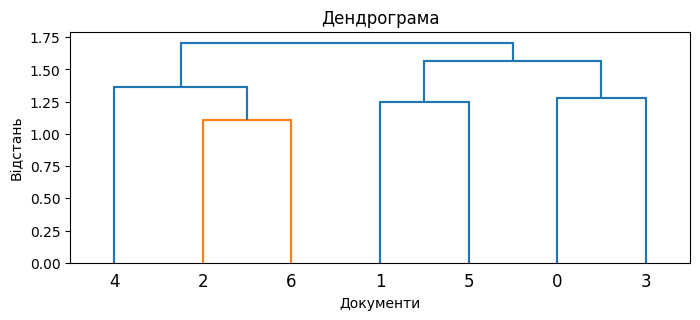

In [6]:
#розраховуємо подібність між документам для подальгої кластеризації
similarity_matrix = cosine_similarity(tt_matrix)
# на основі вже готової матриці подібності документів будується матриця зв'язку
links = linkage(similarity_matrix, 'ward')
#виконуємо кластеризацію
plt.figure(figsize=(8, 3))
plt.title('Дендрограма')
plt.xlabel('Документи')
plt.ylabel('Відстань')
dendrogram(links)
print(dendrogram(links))

In [7]:
# ...
max_dist = 1.5
cluster_labels = fcluster(links, max_dist, criterion='distance')
print(cluster_labels)

[3 2 1 3 1 2 1]


In [8]:
# представляємо корпус як модель Word2Vec
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in p_corpus]
feature_size = 100
window_context = 30
min_word_count = 1
sample = 1e-3
w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size=feature_size,window=window_context, min_count=min_word_count,sample=sample)
# знаходмо подібні слова до слів shrimp, economy
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term],topn=5)]
for search_term in ['shrimp', 'economy']}
print(similar_words)

{'shrimp': ['evaporated', 'juice', 'stagnated', 'long', 'new'], 'economy': ['months', 'long', 'shrimp', 'cinema', 'world']}
